## Logistic Regression Demo (2-class) ##

Import libraries

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
image_size = 28

Read training data. We will be using this data for both training and testing since the test data doesn't have labels and we can't evaluate our performance without labels.

In [2]:
traindata = pd.read_csv('../../old/cs 250 Data/MNIST/train.csv')
traindata.head()
#testdata = pd.read_csv(r'data/MNIST/test.csv')
#testdata.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separate the training labels and training data (digits) like in previous examples.

In [3]:
trainlabels = np.asarray(traindata.label) 
traindigits = np.asarray(traindata)
traindigits = traindigits[:,1:]

#testdigits = np.asarray(testdata)

Decide the classes to be used for this demo (any two digits will do, such as 2 and 5). Decide on the number of training images and test images from each class to be used. Then create the training and test arrays. Here, training and test arrays have 1000 and 200 data items respectively. Play with these numbers to see how that affects the results. The "X" arrays (trainX and testX) contain the digits. The "y" arrays (trainy and testy) contain the labels of those digits. The test arrays are not used for training.

In [8]:
#Read data from two classes into train and test arrays
numTrain = 1000
numTest = 200
allX = np.zeros([(numTrain+numTest)*2,784])
ally = np.zeros([(numTrain+numTest)*2])

label1 = 6
label2 = 8
count1 = 0
count2 = 0

for x in range(len(trainlabels)):
    if trainlabels[x]==label1 and count1<numTrain+numTest:
        allX[count1,:] = traindigits[x,:]
        ally[count1] = trainlabels[x]
        count1 = count1 + 1   
        
    if trainlabels[x] == label2 and count2<numTrain+numTest:
        
        allX[numTrain+numTest+count2,:] = traindigits[x,:]
        ally[numTrain+numTest+count2] = trainlabels[x]
        count2 = count2 + 1

trainX = np.concatenate((allX[:numTrain,:],allX[numTrain+numTest:2*numTrain+numTest,:]),axis=0)
trainy = np.concatenate((ally[:numTrain],ally[numTrain+numTest:2*numTrain+numTest]),axis=0)   
testX = np.concatenate((allX[numTrain:numTrain+numTest,:],allX[2*numTrain+numTest:,:]),axis=0)
testy = np.concatenate((ally[numTrain:numTrain+numTest],ally[2*numTrain+numTest:]),axis=0)

print(trainX.shape, trainy.shape, testX.shape, testy.shape)
trainy

(2000, 784) (2000,) (400, 784) (400,)


array([6., 6., 6., ..., 8., 8., 8.])

The Logistic Regression model follows a **Sigmoid Curve** which has the equation:

## $ p = \frac{1}  {(1 + e ^{-y})} $ ##

Where *p* is the probability of the class label being 1. From this equation we get

## $ y = ln(\frac{p}{1-p})$ ##

Equating that to our Linear Regression equation we get 

## $ ln(\frac{p}{1-p}) = b_0 + b_1x $ ##


In [9]:
# Build model and fit on training data
model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='auto',max_iter=1000)
model.fit(trainX, trainy)


LogisticRegression(max_iter=1000, random_state=0)

In [10]:
#Run model on test data
print(model.score(testX, testy))

0.9825


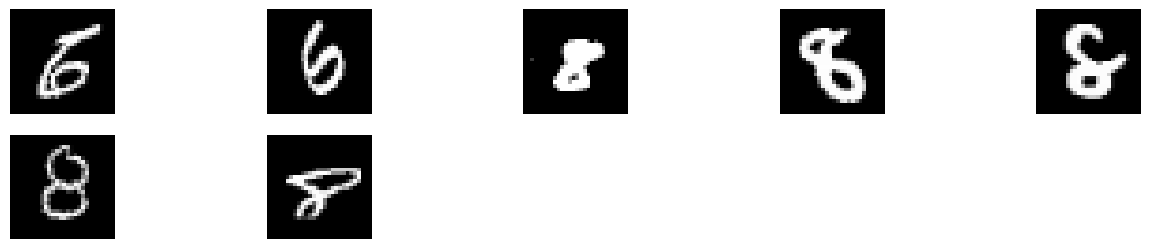

In [11]:
#Visualize wrong results
guesses = model.predict(testX)
wrong = np.not_equal(guesses,testy)
fig = plt.figure(figsize=(16, 16))
count = 0
for index in range(len(wrong)):
    if wrong[index]:
        count = count +1
        image = testX[index].reshape(image_size, image_size)
        temp = fig.add_subplot(10,5,count)
        temp.imshow(image,cmap='gray')
        temp.axis('off')
        
        
    
    